**Movie Recommendation System**

**Objective**

---
The goal of this project is to develop a movie recommendation system capable of predicting a user's potential rating for a film based on their previous ratings and the ratings given by other users. This system will offer personalized movie suggestions, aiding users in finding new films they are likely to enjoy.


**Data Source**

---

The data source is a CSV file named "Movies Recommendation.csv," hosted on GitHub in the YBI-Foundation/Dataset repository. This file includes details about movies, such as genre, keywords, tagline, cast, director, and possibly ratings.

In [ ]:
# Import Libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
import matplotlib.pyplot as plt

In [ ]:
# Import Data

dataset = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

**Describe** **Data**

In [ ]:
dataset.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
dataset.shape

(4760, 21)

In [ ]:
dataset.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

**Data Visualization**

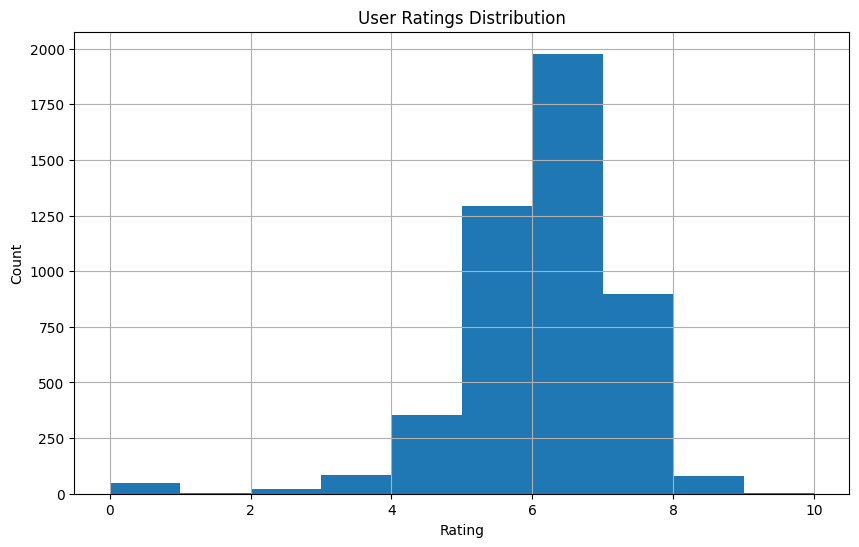

In [ ]:
# pyplot as plt
plt.figure(figsize=(10,6))
dataset['Movie_Vote'].hist(bins=10)
plt.title('User Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Data Preprocessing**

In [ ]:
# shape of the dataset
dataset.shape

(4760, 21)

In [ ]:
# check for null values
dataset.columns.isnull().sum()

0

In [ ]:
# select the feature data for the process
feature_data= dataset[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']]
feature_data

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,NaN,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,NaN,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,NaN,NaN,NaN,NaN


In [ ]:
# fill NA
for i in feature_data:
    dataset[i]=dataset[i].fillna('')

**Compaining data in row vice**

In [ ]:
compained_feature = dataset['Movie_Genre']+'  '+dataset['Movie_Keywords']+'  '+dataset['Movie_Tagline']+'  '+dataset['Movie_Director']
compained_feature

0       Crime Comedy  hotel new year's eve witch bet h...
1       Adventure Action Science Fiction  android gala...
2       Animation Family  father son relationship harb...
3       Comedy Drama Romance  vietnam veteran hippie m...
4       Drama  male nudity female nudity adultery midl...
                              ...                        
4755    Horror    The hot spot where Satan's waitin'. ...
4756    Comedy Family Drama    It’s better to stand ou...
4757    Thriller Drama  christian film sex trafficking...
4758                                         Family      
4759    Documentary  music actors legendary perfomer c...
Length: 4760, dtype: object

**Convert text values into numeric values**

In [ ]:
vc = TfidfVectorizer()
vector_feature = vc.fit_transform(compained_feature)
vector_feature.shape

(4760, 9666)

**Consine Similarity**

---
for checking the similarity datas in feature


In [ ]:
similarity=cosine_similarity(vector_feature)
print(similarity)

[[1.         0.01723123 0.04583093 ... 0.         0.         0.        ]
 [0.01723123 1.         0.01127435 ... 0.         0.         0.        ]
 [0.04583093 0.01127435 1.         ... 0.         0.09498713 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.09498713 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
moive_name = input('Enter Movie Name| : ')


Enter Movie Name| : Spiderman


In [ ]:
# select all the movies_title in to list
lis_mov_title = dataset['Movie_Title'].tolist()

In [ ]:
# find the close match of the movies
find_close_match = difflib.get_close_matches(moive_name,lis_mov_title)
find_close_match

['Spider-Man', 'Superman', 'Spider']

In [ ]:
# display the  close match movies
close_match = find_close_match[0]
close_match

'Spider-Man'

In [ ]:
# find the index of the movie with title
index_of_title = dataset[dataset.Movie_Title==close_match]['Movie_ID'].values[0]
print(index_of_title)

231


In [ ]:
# get the similar movies
lis_of_similar_mv = list(enumerate(similarity[index_of_title]))

In [ ]:
# length of the similar movies
len(lis_of_similar_mv)

4760

In [ ]:
# sort the similar movies list
sort_similar_mv = sorted(lis_of_similar_mv,key=lambda x:x[1],reverse=True)
#print(sort_similar_mv)

In [ ]:
# print sugested movies
print('Top 30 movies suggested for you : \n')
i=1
for movie in sort_similar_mv:
    index = movie[0]
    suggested_movs = dataset[dataset.index==index]['Movie_Title'].values[0]
    if (i<31):
        print(i,' ',suggested_movs)
        i+=1

Top 30 movies suggested for you : 

1   Spider-Man 2
2   Spider-Man 3
3   30 Minutes or Less
4   The Amazing Spider-Man 2
5   Deadpool
6   The One
7   Avengers: Age of Ultron
8   Thor
9   Crocodile Dundee
10   Sexy Beast
11   Oz: The Great and Powerful
12   The Mask
13   Kick-Ass 2
14   Captain America: Civil War
15   A History of Violence
16   Evil Dead II
17   Iron Man 2
18   Watchmen
19   X-Men
20   Where the Wild Things Are
21   X-Men: The Last Stand
22   X-Men: Days of Future Past
23   Ant-Man
24   The New Guy
25   The Amazing Spider-Man
26   Spider-Man
27   Thor: The Dark World
28   Two Lovers
29   Thir13en Ghosts
30   Hancock


**Top 10 movies recommendation**

In [ ]:
# Prompt user to input a movie name
moive_name = input('Enter Movie Name : ')

# Select all the movie titles into a list
lis_mov_title = dataset['Movie_Title'].tolist()

# Find the closest match to the entered movie name
find_close_match = difflib.get_close_matches(moive_name, lis_mov_title)

# Select the closest match
close_match = find_close_match[0]

# Get the index of the movie title that matches the close match
index_of_title = dataset[dataset.Movie_Title == close_match]['Movie_ID'].values[0]

# Calculate recommendation scores based on similarity index
recommendation_score = list(enumerate(similarity[index_of_title]))

# Sort the similar movies based on recommendation scores in descending order
sort_similar_mv = sorted(recommendation_score, key=lambda x: x[1], reverse=True)

# Print the top 10 suggested movies
print('Top 10 Movies Suggested For You : \n')
i = 1
for movie in sort_similar_mv:
    index = movie[0]
    suggested_movs = dataset[dataset.index == index]['Movie_Title'].values[0]
    if (i < 11):
        print(i, ' ', suggested_movs)
        i += 1

Enter Movie Name : John Wick
Top 10 Movies Suggested For You : 

1   Wild Wild West
2   Men in Black II
3   The Helix... Loaded
4   Get Shorty
5   Abraham Lincoln: Vampire Hunter
6   Star Trek: Generations
7   The Ridiculous 6
8   Meet Dave
9   Recess: School's Out
10   Men in Black


**Conclusion**

This project builds a movie recommendation system using Python libraries such as pandas, scikit-learn, and matplotlib. It generates personalized movie suggestions based on user ratings and movie similarities, involving steps like data preprocessing, cosine similarity calculation, and recommendation generation.

Designed for movie enthusiasts and businesses, the system can be enhanced by including more data sources, such as user reviews, and exploring advanced machine learning models for better accuracy and personalization. This project highlights the power of Python libraries in developing a robust recommendation system.






